In [94]:
import math
import numpy as np
import pandas as pd
import random as rd
import sys, os
import scipy.io as sio
import pickle 
import matplotlib.pyplot as plt #for plots
import matplotlib.cm as cm  #for color maps
from sklearn.decomposition import PCA
from numpy.testing import assert_array_almost_equal
import matplotlib as mpl #for color matrices
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns # can also be used for plots
from sklearn.cluster import KMeans

In [95]:
vp_2016 = pd.read_csv('2016_data.csv')
p_2022 = pd.read_csv('2022_data.csv')

In [96]:
vp_2016

REGION  REGISTERED VOTER  Robredo   Marcos  Escudero  Honasan  \
0           NCR           6253249  1361957  2179614    503554    70346   
1           CAR            906162   116183   446831     58688    12318   
2      REGION I           2950775   298266  1766067    170093    22159   
3     REGION II           1920952   184520  1047037     93672    26927   
4    REGION III           6056392  1334418  2136843    717400    74949   
5   REGION IV-A           7619272  1972819  1863898   1012501   126085   
6   REGION IV-B           1589326   491161   264523    209408    34421   
7      REGION V           3121662  1499923   187235    476483    34275   
8     REGION VI           4242153  1981361   431813    333802    47939   
9    REGION VII           4375756  1366049   459314    308309    72539   
10  REGION VIII           2698880   686300   723540    238757    38410   
11    REGION IX           1931795   472530   314508    138340    34084   
12     REGION X           2541331   694373   436498    163748    46223   
13    REGION XI           2659704   233920   467186     93451    20220   
14   REGION XII           2086112   422703   512071    102827    35560   
15       CARAGA           1547093   406274   208034     94561    16596   
16        BARMM           1691250   460143   280117     89878    45876   

    Cayetano     MALE   FEMALE  17 - 19  ...  50 - 54  55 - 59     60+  \
0     611462  2826592  3426657   364479  ...   479318   402000  721967   
1      26066   456154   450008    37430  ...    67911    57776  118218   
2      63890  1452533  1498242   116227  ...   222905   193295  433725   
3      35593   954207   966745   148010  ...   147314   122624  216210   
4     353146  2900306  3156086   217194  ...   472514   393567  788004   
5     526733  3570413  4048859   464721  ...   554538   461908  835169   
6      83666   785864   803462    63902  ...   116705    98396  199106   
7      80885  1515434  1606228   146111  ...   230162   195013  426092   
8     207550  2077634  2164519   437071  ...   316199   266560  539210   
9     933656  2113472  2262284   177953  ...   318759   271819  614619   
10    182686  1360862  1338018   147418  ...   195117   166817  397889   
11    219229   963741   968054    82696  ...   145649   119818  240614   
12    435233  1256850  1284481    98479  ...   192085   163387  327808   
13   1074658  1314703  1345001   216472  ...   187682   155591  258288   
14    366278  1053254  1032858    65649  ...   155609   124358  228523   
15    270118   779567   767526    73219  ...   115069    96989  204366   
16    151147   847294   843956   175370  ...    95878    67358  127052   

    ILLITERATE  INDIGENOUS    PWD   SINGLE  MARRIED  WIDOW/ER  SEPARATED  
0         6577           9  12973  3385814  2707410    139468      20557  
1        12953       33555   7979   407253   473090     23974       1845  
2        12846        7875   9850  1363862  1507230     75603       4080  
3        13407        3915  11327   743417  1127931     47581       2023  
4        24916        2622  10733  2845341  3078849    118802      13400  
5        45765          42  18952  3824596  3599938    176450      18288  
6        41571       17813  10959   689092   856068     41633       2533  
7        42684         536  21676  1489820  1546140     81991       3711  
8        56684         540  34798  2033520  2104466     99628       4539  
9        57849         254  35189  2180216  2092110     97493       5937  
10       78027          43  51101  1420762  1213495     60022       4601  
11       71190         667  23723   888110   989159     49280       5246  
12       75766        1792  11763  1177901  1295622     62341       5467  
13       42030       10339  12641  1302131  1297441     54987       5145  
14       81783       11694  22096   939275  1103101     40367       3369  
15       34199        8067  16820   753855   750047     40687       2504  
16      868320           0   3990   664128   961151     52651      1

In [97]:
for index, row in vp_2016.iterrows():
    for i in range(2, len(row)):
        vp_2016.iloc[index, i] = vp_2016.iloc[index, i] / vp_2016.iloc[index, 1]

for index, row in p_2022.iterrows():
    for i in range(2, len(row)):
        p_2022.iloc[index, i] = p_2022.iloc[index, i] / p_2022.iloc[index, 1]
        

In [98]:
vp_2016

REGION  REGISTERED VOTER   Robredo    Marcos  Escudero   Honasan  \
0           NCR           6253249  0.217800  0.348557  0.080527  0.011250   
1           CAR            906162  0.128214  0.493103  0.064765  0.013594   
2      REGION I           2950775  0.101081  0.598510  0.057644  0.007510   
3     REGION II           1920952  0.096057  0.545062  0.048763  0.014018   
4    REGION III           6056392  0.220332  0.352824  0.118453  0.012375   
5   REGION IV-A           7619272  0.258925  0.244629  0.132887  0.016548   
6   REGION IV-B           1589326  0.309037  0.166437  0.131759  0.021658   
7      REGION V           3121662  0.480489  0.059979  0.152638  0.010980   
8     REGION VI           4242153  0.467065  0.101791  0.078687  0.011301   
9    REGION VII           4375756  0.312186  0.104968  0.070458  0.016577   
10  REGION VIII           2698880  0.254291  0.268089  0.088465  0.014232   
11    REGION IX           1931795  0.244607  0.162806  0.071612  0.017644   
12     REGION X           2541331  0.273232  0.171760  0.064434  0.018189   
13    REGION XI           2659704  0.087950  0.175653  0.035136  0.007602   
14   REGION XII           2086112  0.202627  0.245467  0.049291  0.017046   
15       CARAGA           1547093  0.262605  0.134468  0.061122  0.010727   
16        BARMM           1691250  0.272073  0.165627  0.053143  0.027125   

    Cayetano      MALE    FEMALE   17 - 19  ...   50 - 54   55 - 59       60+  \
0   0.097783  0.452020  0.547980  0.058286  ...  0.076651  0.064287  0.115455   
1   0.028765  0.503391  0.496609  0.041306  ...  0.074944  0.063759  0.130460   
2   0.021652  0.492255  0.507745  0.039389  ...  0.075541  0.065507  0.146987   
3   0.018529  0.496737  0.503263  0.077050  ...  0.076688  0.063835  0.112554   
4   0.058310  0.478883  0.521117  0.035862  ...  0.078019  0.064984  0.130111   
5   0.069132  0.468603  0.531397  0.060993  ...  0.072781  0.060624  0.109613   
6   0.052642  0.494464  0.505536  0.040207  ...  0.073430  0.061911  0.125277   
7   0.025911  0.485457  0.514543  0.046806  ...  0.073731  0.062471  0.136495   
8   0.048926  0.489759  0.510241  0.103030  ...  0.074537  0.062836  0.127108   
9   0.213370  0.482996  0.517004  0.040668  ...  0.072847  0.062119  0.140460   
10  0.067690  0.504232  0.495768  0.054622  ...  0.072296  0.061810  0.147427   
11  0.113485  0.498884  0.501116  0.042808  ...  0.075396  0.062024  0.124555   
12  0.171262  0.494564  0.505436  0.038751  ...  0.075584  0.064292  0.128991   
13  0.404052  0.494304  0.505696  0.081390  ...  0.070565  0.058499  0.097112   
14  0.175579  0.504889  0.495111  0.031470  ...  0.074593  0.059612  0.109545   
15  0.174597  0.503891  0.496109  0.047327  ...  0.074378  0.062691  0.132097   
16  0.089370  0.500987  0.499013  0.103693  ...  0.056691  0.039827  0.075123   

    ILLITERATE  INDIGENOUS       PWD    SINGLE   MARRIED  WIDOW/ER  SEPARATED  
0     0.001052    0.000001  0.002075  0.541449  0.432961  0.022303   0.003287  
1     0.014294    0.037030  0.008805  0.449426  0.522081  0.026457   0.002036  
2     0.004353    0.002669  0.003338  0.462205  0.510791  0.025621   0.001383  
3     0.006979    0.002038  0.005897  0.387004  0.587173  0.024769   0.001053  
4     0.004114    0.000433  0.001772  0.469808  0.508364  0.019616   0.002213  
5     0.006006    0.000006  0.002487  0.501963  0.472478  0.023158   0.002400  
6     0.026156    0.011208  0.006895  0.433575  0.538636  0.026195   0.001594  
7     0.013673    0.000172  0.006944  0.477252  0.495294  0.026265   0.001189  
8     0.013362    0.000127  0.008203  0.479360  0.496084  0.023485   0.001070  
9     0.013220    0.000058  0.008042  0.498249  0.478114  0.022280   0.001357  
10    0.028911    0.000016  0.018934  0.526427  0.449629  0.022240   0.001705  
11    0.036852    0.000345  0.012280  0.459733  0.512041  0.025510   0.002716  
12    0.029814    0.000705  0.004629  0.463498  0.509820  0.024531   0.002151  
13    0.015803    0.003887  0.004753  0.489

In [99]:
vp_2016 = vp_2016.drop(columns=['REGION', 'REGISTERED VOTER'])
p_2022 = p_2022.drop(columns=['REGION', 'REGISTERED VOTER'])
vp_2016

Robredo    Marcos  Escudero   Honasan  Cayetano      MALE    FEMALE  \
0   0.217800  0.348557  0.080527  0.011250  0.097783  0.452020  0.547980   
1   0.128214  0.493103  0.064765  0.013594  0.028765  0.503391  0.496609   
2   0.101081  0.598510  0.057644  0.007510  0.021652  0.492255  0.507745   
3   0.096057  0.545062  0.048763  0.014018  0.018529  0.496737  0.503263   
4   0.220332  0.352824  0.118453  0.012375  0.058310  0.478883  0.521117   
5   0.258925  0.244629  0.132887  0.016548  0.069132  0.468603  0.531397   
6   0.309037  0.166437  0.131759  0.021658  0.052642  0.494464  0.505536   
7   0.480489  0.059979  0.152638  0.010980  0.025911  0.485457  0.514543   
8   0.467065  0.101791  0.078687  0.011301  0.048926  0.489759  0.510241   
9   0.312186  0.104968  0.070458  0.016577  0.213370  0.482996  0.517004   
10  0.254291  0.268089  0.088465  0.014232  0.067690  0.504232  0.495768   
11  0.244607  0.162806  0.071612  0.017644  0.113485  0.498884  0.501116   
12  0.273232  0.171760  0.064434  0.018189  0.171262  0.494564  0.505436   
13  0.087950  0.175653  0.035136  0.007602  0.404052  0.494304  0.505696   
14  0.202627  0.245467  0.049291  0.017046  0.175579  0.504889  0.495111   
15  0.262605  0.134468  0.061122  0.010727  0.174597  0.503891  0.496109   
16  0.272073  0.165627  0.053143  0.027125  0.089370  0.500987  0.499013   

     17 - 19   20 - 24   25 - 29  ...   50 - 54   55 - 59       60+  \
0   0.058286  0.133138  0.130246  ...  0.076651  0.064287  0.115455   
1   0.041306  0.148561  0.149154  ...  0.074944  0.063759  0.130460   
2   0.039389  0.143501  0.133332  ...  0.075541  0.065507  0.146987   
3   0.077050  0.149037  0.129077  ...  0.076688  0.063835  0.112554   
4   0.035862  0.136792  0.135842  ...  0.078019  0.064984  0.130111   
5   0.060993  0.139379  0.134493  ...  0.072781  0.060624  0.109613   
6   0.040207  0.152886  0.140319  ...  0.073430  0.061911  0.125277   
7   0.046806  0.156526  0.135496  ...  0.073731  0.062471  0.136495   
8   0.103030  0.141977  0.117373  ...  0.074537  0.062836  0.127108   
9   0.040668  0.148520  0.142519  ...  0.072847  0.062119  0.140460   
10  0.054622  0.158434  0.132716  ...  0.072296  0.061810  0.147427   
11  0.042808  0.151975  0.143464  ...  0.075396  0.062024  0.124555   
12  0.038751  0.147595  0.143967  ...  0.075584  0.064292  0.128991   
13  0.081390  0.150571  0.141653  ...  0.070565  0.058499  0.097112   
14  0.031470  0.144752  0.148716  ...  0.074593  0.059612  0.109545   
15  0.047327  0.154816  0.144238  ...  0.074378  0.062691  0.132097   
16  0.103693  0.218944  0.134906  ...  0.056691  0.039827  0.075123   

    ILLITERATE  INDIGENOUS       PWD    SINGLE   MARRIED  WIDOW/ER  SEPARATED  
0     0.001052    0.000001  0.002075  0.541449  0.432961  0.022303   0.003287  
1     0.014294    0.037030  0.008805  0.449426  0.522081  0.026457   0.002036  
2     0.004353    0.002669  0.003338  0.462205  0.510791  0.025621   0.001383  
3     0.006979    0.002038  0.005897  0.387004  0.587173  0.024769   0.001053  
4     0.004114    0.000433  0.001772  0.469808  0.508364  0.019616   0.002213  
5     0.006006    0.000006  0.002487  0.501963  0.472478  0.023158   0.002400  
6     0.026156    0.011208  0.006895  0.433575  0.538636  0.026195   0.001594  
7     0.013673    0.000172  0.006944  0.477252  0.495294  0.026265   0.001189  
8     0.013362    0.000127  0.008203  0.479360  0.496084  0.023485   0.001070  
9     0.013220    0.000058  0.008042  0.498249  0.478114  0.022280   0.001357  
10    0.028911    0.000016  0.018934  0.526427  0.449629  0.022240   0.001705  
11    0.036852    0.000345  0.012280  0.459733  0.512041  0.025510   0.002716  
12    0.029814    0.000705  0.004629  0.463498  0.509820  0.024531   0.002151  
13    0.015803    0.003887  0.004753  0.489577  0.487814  0.020674   0.001934  
14    0.039204    0.005606  0.010592  0.450251  0.528783  0.019350   0.001615  
15    0.022105    0.005214  0.010872  0.487272  0.484811  0.026299   0.001619

In [100]:
delta_2016vp_2022p = p_2022.copy()
delta_2016vp_2022p['R'] = p_2022['Robredo'] - vp_2016['Robredo']
delta_2016vp_2022p['M'] = p_2022['Marcos'] - vp_2016['Marcos']
delta_2016vp_2022p = delta_2016vp_2022p.drop(columns=['Robredo', 'Marcos', 'Pacquiao', 'Domagoso', 'Lacson'])
delta_2016vp_2022p

MALE    FEMALE   17 - 19   20 - 24   25 - 29   30 - 34   35 - 39  \
0   0.455373  0.544627  0.029420  0.113102  0.126741  0.118857  0.105179   
1   0.506485  0.493515  0.042250  0.127960  0.129900  0.124653  0.104294   
2   0.499004  0.500996  0.048001  0.131080  0.124896  0.112465  0.099076   
3   0.502863  0.497137  0.042712  0.127277  0.128198  0.114899  0.098305   
4   0.483127  0.516873  0.039536  0.126911  0.127383  0.116560  0.101566   
5   0.472167  0.527833  0.036810  0.124852  0.129583  0.118542  0.106163   
6   0.498223  0.501777  0.048665  0.142457  0.131952  0.117184  0.101275   
7   0.491951  0.508049  0.057660  0.151705  0.130513  0.112953  0.094543   
8   0.492549  0.507451  0.042723  0.128819  0.123243  0.113513  0.096850   
9   0.488056  0.511944  0.043450  0.132666  0.130630  0.121888  0.100647   
10  0.505700  0.494300  0.054853  0.146143  0.131448  0.113189  0.092065   
11  0.501450  0.498550  0.047302  0.136399  0.135583  0.121671  0.097856   
12  0.498560  0.501440  0.047785  0.136083  0.131574  0.124124  0.100292   
13  0.499062  0.500938  0.036519  0.122487  0.130783  0.128776  0.109020   
14  0.505103  0.494897  0.039074  0.131297  0.135214  0.126571  0.108369   
15  0.509219  0.490781  0.052268  0.142793  0.130953  0.122728  0.098865   
16  0.501208  0.498792  0.046771  0.149251  0.180805  0.129444  0.102420   

     40 - 44   45 - 49   50 - 54  ...       60+  ILLITERATE  INDIGENOUS  \
0   0.102118  0.087485  0.082280  ...  0.164926    0.000287    0.000025   
1   0.092979  0.078128  0.072593  ...  0.161028    0.013042    0.194224   
2   0.093457  0.079048  0.075834  ...  0.169828    0.002839    0.009921   
3   0.093627  0.082554  0.077785  ...  0.164978    0.007494    0.016298   
4   0.098302  0.084969  0.081148  ...  0.154708    0.002233    0.003305   
5   0.103255  0.087128  0.078587  ...  0.148724    0.001753    0.000395   
6   0.092501  0.081770  0.073175  ...  0.148204    0.024839    0.035170   
7   0.087690  0.077287  0.071302  ...  0.153174    0.006974    0.001070   
8   0.089628  0.080069  0.076220  ...  0.180043    0.011747    0.003056   
9   0.092277  0.079817  0.073501  ...  0.161248    0.011455    0.000317   
10  0.084955  0.077388  0.071137  ...  0.165223    0.026321    0.000166   
11  0.090245  0.081190  0.074853  ...  0.150095    0.026205    0.013394   
12  0.091415  0.079777  0.074417  ...  0.150056    0.010565    0.008479   
13  0.096908  0.085586  0.076643  ...  0.148292    0.015283    0.031548   
14  0.096411  0.085755  0.076568  ...  0.137979    0.033928    0.043267   
15  0.086428  0.077732  0.071760  ...  0.152594    0.014456    0.010524   
16  0.086943  0.076193  0.067364  ...  0.112151    0.056760    0.004388   

         PWD    SINGLE   MARRIED  WIDOW/ER  SEPARATED         R         M  
0   0.003946  0.596909  0.385795  0.015146   0.002150  0.028568  0.097138  
1   0.008576  0.507979  0.473397  0.017349   0.001274 -0.046109  0.199830  
2   0.004261  0.530749  0.451399  0.016969   0.000883 -0.008182  0.119894  
3   0.006273  0.457065  0.524723  0.017520   0.000692 -0.023488  0.148967  
4   0.002875  0.538059  0.447870  0.012676   0.001395  0.003413  0.187216  
5   0.003788  0.563884  0.419577  0.015042   0.001498  0.027981  0.187572  
6   0.007115  0.516251  0.465834  0.016948   0.000968 -0.043361  0.190594  
7   0.007808  0.564182  0.417764  0.017310   0.000744  0.146440  0.084917  
8   0.008044  0.539863  0.443394  0.016036   0.000707 -0.081227  0.199778  
9   0.008227  0.558486  0.426166  0.014471   0.000877 -0.138038  0.333904  
10  0.017934  0.601774  0.383023  0.014101   0.001102 -0.069953  0.226245  
11  0.011061  0.532908  0.448635  0.016807   0.001650 -0.130545  0.279843  
12  0.005187  0.536112  0.446966  0.015598   0.001323 -0.183561  0.389857  
13  0.005009  0.548140  0.436475  0.014195   0.001190 -0.046340  0.462462  
14  0.009204  0.516152  0.469132  0.013686   0.001030 -0.103735  0.240550  
15  0.012479  0.560893  0.421412  0.016722   0.000973 -0.108414  0.37328

In [101]:
p_2022

Marcos   Robredo  Pacquiao  Domagoso    Lacson      MALE    FEMALE  \
0   0.445695  0.246368  0.012578  0.071219  0.018709  0.455373  0.544627   
1   0.692933  0.082105  0.018730  0.012378  0.019746  0.506485  0.493515   
2   0.718404  0.092899  0.009715  0.013543  0.008738  0.499004  0.500996   
3   0.694028  0.072569  0.013543  0.010310  0.009290  0.502863  0.497137   
4   0.540041  0.223745  0.014994  0.032472  0.016730  0.483127  0.516873   
5   0.432202  0.286906  0.021561  0.038394  0.026761  0.472167  0.527833   
6   0.357031  0.265676  0.111919  0.037644  0.019542  0.498223  0.501777   
7   0.144896  0.626928  0.025484  0.008566  0.005355  0.491951  0.508049   
8   0.301569  0.385838  0.072058  0.027924  0.010037  0.492549  0.507451   
9   0.438872  0.174148  0.142847  0.024538  0.012849  0.488056  0.511944   
10  0.494334  0.184338  0.072109  0.022087  0.007608  0.505700  0.494300   
11  0.442649  0.114062  0.149967  0.019487  0.005957  0.501450  0.498550   
12  0.561617  0.089671  0.107459  0.016521  0.006803  0.498560  0.501440   
13  0.638115  0.041609  0.062597  0.007569  0.007266  0.499062  0.500938   
14  0.486017  0.098892  0.152742  0.015788  0.008308  0.505103  0.494897   
15  0.507754  0.154191  0.088972  0.011913  0.005728  0.509219  0.490781   
16  0.388599  0.167003  0.014079  0.020837  0.002089  0.501208  0.498792   

     17 - 19   20 - 24   25 - 29  ...   50 - 54   55 - 59       60+  \
0   0.029420  0.113102  0.126741  ...  0.082280  0.069892  0.164926   
1   0.042250  0.127960  0.129900  ...  0.072593  0.066216  0.161028   
2   0.048001  0.131080  0.124896  ...  0.075834  0.066316  0.169828   
3   0.042712  0.127277  0.128198  ...  0.077785  0.069665  0.164978   
4   0.039536  0.126911  0.127383  ...  0.081148  0.068917  0.154708   
5   0.036810  0.124852  0.129583  ...  0.078587  0.066354  0.148724   
6   0.048665  0.142457  0.131952  ...  0.073175  0.062816  0.148204   
7   0.057660  0.151705  0.130513  ...  0.071302  0.063173  0.153174   
8   0.042723  0.128819  0.123243  ...  0.076220  0.068892  0.180043   
9   0.043450  0.132666  0.130630  ...  0.073501  0.063877  0.161248   
10  0.054853  0.146143  0.131448  ...  0.071137  0.063597  0.165223   
11  0.047302  0.136399  0.135583  ...  0.074853  0.064808  0.150095   
12  0.047785  0.136083  0.131574  ...  0.074417  0.064479  0.150056   
13  0.036519  0.122487  0.130783  ...  0.076643  0.064985  0.148292   
14  0.039074  0.131297  0.135214  ...  0.076568  0.062762  0.137979   
15  0.052268  0.142793  0.130953  ...  0.071760  0.063878  0.152594   
16  0.046771  0.149251  0.180805  ...  0.067364  0.048658  0.112151   

    ILLITERATE  INDIGENOUS       PWD    SINGLE   MARRIED  WIDOW/ER  SEPARATED  
0     0.000287    0.000025  0.003946  0.596909  0.385795  0.015146   0.002150  
1     0.013042    0.194224  0.008576  0.507979  0.473397  0.017349   0.001274  
2     0.002839    0.009921  0.004261  0.530749  0.451399  0.016969   0.000883  
3     0.007494    0.016298  0.006273  0.457065  0.524723  0.017520   0.000692  
4     0.002233    0.003305  0.002875  0.538059  0.447870  0.012676   0.001395  
5     0.001753    0.000395  0.003788  0.563884  0.419577  0.015042   0.001498  
6     0.024839    0.035170  0.007115  0.516251  0.465834  0.016948   0.000968  
7     0.006974    0.001070  0.007808  0.564182  0.417764  0.017310   0.000744  
8     0.011747    0.003056  0.008044  0.539863  0.443394  0.016036   0.000707  
9     0.011455    0.000317  0.008227  0.558486  0.426166  0.014471   0.000877  
10    0.026321    0.000166  0.017934  0.601774  0.383023  0.014101   0.001102  
11    0.026205    0.013394  0.011061  0.532908  0.448635  0.016807   0.001650  
12    0.010565    0.008479  0.005187  0.536112  0.446966  0.015598   0.001323  
13    0.015283    0.031548  0.005009  0.548140  0.436475  0.014195   0.001190  
14    0.033928    0.043267  0.009204  0.516152  0.469132  0.013686   0.001030  
15    0.014456    0.010524  0.012479  0.560893  0.421412  0.016722   0.000973 

In [102]:
delta_2016vp_2022p_age = delta_2016vp_2022p.drop(columns=['MALE', 'FEMALE', 'ILLITERATE', 'INDIGENOUS','PWD', 'SINGLE', 'MARRIED', 'WIDOW/ER', 'SEPARATED'])

In [103]:
vp_2016_pca = PCA()
vp_2016_pca.fit(vp_2016)

p_2022_pca = PCA()
p_2022_pca.fit(p_2022)

delta_2016vp_2022p_pca = PCA()
delta_2016vp_2022p_pca.fit(delta_2016vp_2022p)

delta_2016vp_2022p_age_pca = PCA()
delta_2016vp_2022p_age_pca.fit(delta_2016vp_2022p_age)

PCA()

The explained variance of 1 PCs is 0.520874189174371
The explained variance of 2 PCs is 0.7533171633619138
The explained variance of 3 PCs is 0.9424828842094816
The explained variance of 4 PCs is 0.9723937521638886
The explained variance of 5 PCs is 0.9837874054310702
The explained variance of 6 PCs is 0.9915112440038624
The explained variance of 7 PCs is 0.9956685215766083
The explained variance of 8 PCs is 0.9978819723993517
The explained variance of 9 PCs is 0.9990468500239879


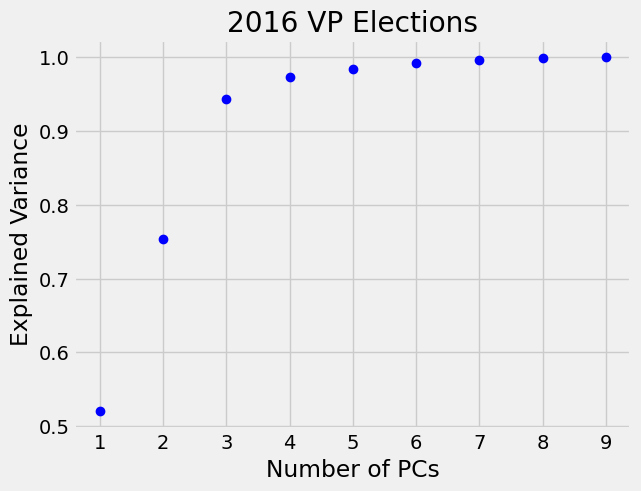

In [104]:
plt.figure()
for i in range(1, 10):
    plt.plot(i, sum(vp_2016_pca.explained_variance_ratio_[0:i]), '-o', color="blue")
    print(f"The explained variance of {i} PCs is {sum(vp_2016_pca.explained_variance_ratio_[0:i])}")

plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title("2016 VP Elections")
plt.savefig("./Paper/figures/2016_variance", bbox_inches='tight')
plt.show()

The explained variance of 1 PCs is 0.7770118620976796
The explained variance of 2 PCs is 0.8789641679879409
The explained variance of 3 PCs is 0.9360165671582348
The explained variance of 4 PCs is 0.969382322247285
The explained variance of 5 PCs is 0.9866864233365691
The explained variance of 6 PCs is 0.9960466339583474
The explained variance of 7 PCs is 0.9980188419590298
The explained variance of 8 PCs is 0.99893226317013
The explained variance of 9 PCs is 0.9994265709936976


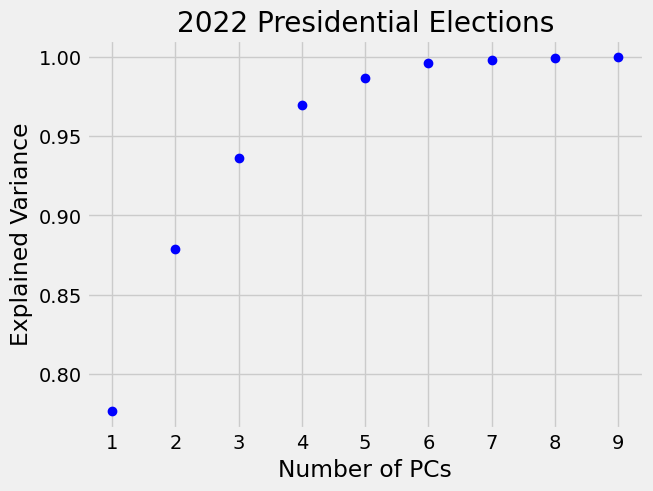

In [105]:
plt.figure()
for i in range(1, 10):
    plt.plot(i, sum(p_2022_pca.explained_variance_ratio_[0:i]), '-o', color="blue")
    print(f"The explained variance of {i} PCs is {sum(p_2022_pca.explained_variance_ratio_[0:i])}")

plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title("2022 Presidential Elections")
plt.savefig("./Paper/figures/2022_variance", bbox_inches='tight')
plt.show()

The explained variance of 1 PCs is 0.6408700004097484
The explained variance of 2 PCs is 0.8094354274577718
The explained variance of 3 PCs is 0.901021596875681
The explained variance of 4 PCs is 0.9631156796702713
The explained variance of 5 PCs is 0.9823079398808775
The explained variance of 6 PCs is 0.996075996377286
The explained variance of 7 PCs is 0.9979365649664979
The explained variance of 8 PCs is 0.9991674743585309
The explained variance of 9 PCs is 0.9996102636763476


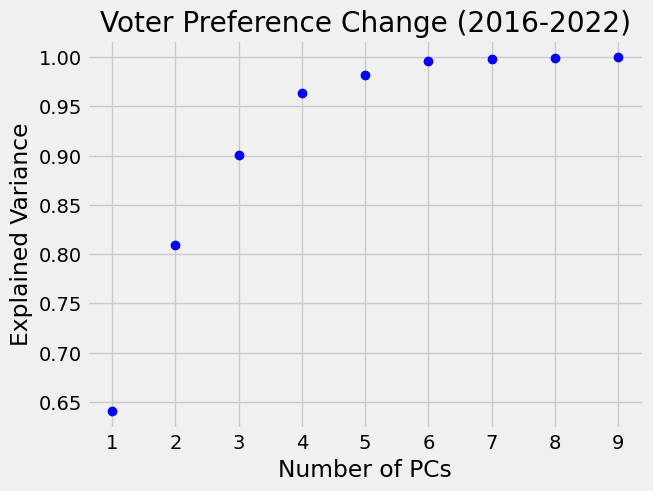

In [106]:
plt.figure()
for i in range(1, 10):
    plt.plot(i, sum(delta_2016vp_2022p_pca.explained_variance_ratio_[0:i]), '-o', color="blue")
    print(f"The explained variance of {i} PCs is {sum(delta_2016vp_2022p_pca.explained_variance_ratio_[0:i])}")

plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title("Voter Preference Change (2016-2022)")
plt.savefig("./Paper/figures/2016_2022_variance", bbox_inches='tight')
plt.show()

The explained variance of 1 PCs is 0.8340553900661384
The explained variance of 2 PCs is 0.9656899969458924
The explained variance of 3 PCs is 0.9878348022097483
The explained variance of 4 PCs is 0.9978605626962321
The explained variance of 5 PCs is 0.9992545245428476
The explained variance of 6 PCs is 0.999698921935239
The explained variance of 7 PCs is 0.9998458156935921
The explained variance of 8 PCs is 0.9999350976083676
The explained variance of 9 PCs is 0.9999675897906081


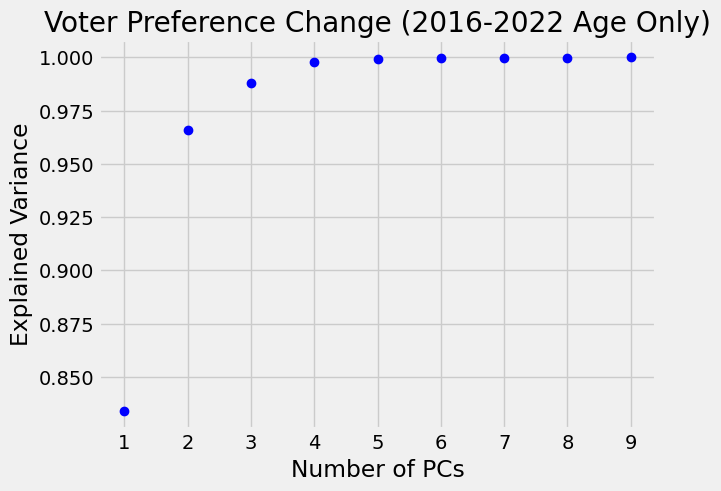

In [107]:
plt.figure()
for i in range(1, 10):
    plt.plot(i, sum(delta_2016vp_2022p_age_pca.explained_variance_ratio_[0:i]), '-o', color="blue")
    print(f"The explained variance of {i} PCs is {sum(delta_2016vp_2022p_age_pca.explained_variance_ratio_[0:i])}")

plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.title("Voter Preference Change (2016-2022 Age Only)")
plt.savefig("./Paper/figures/2016_2022_variance_age", bbox_inches='tight')
plt.show()

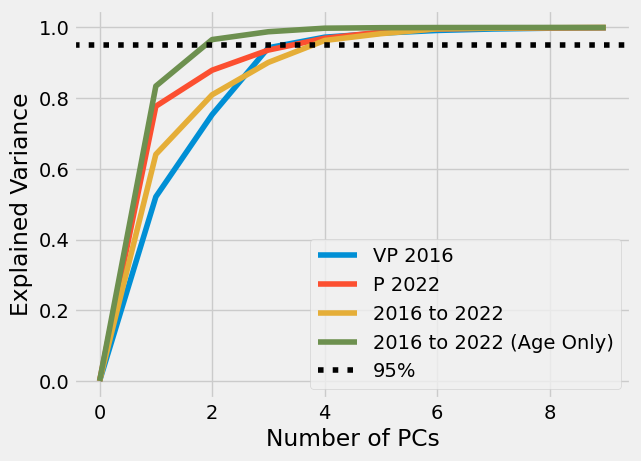

In [108]:
vp_2016_explained_variance = []
p_2022_explained_variance = []
delta_2016vp_2022p_explained_variance = []
delta_2016vp_2022p_age_explained_variance = []
number_of_pcs = 10

for i in range(0, number_of_pcs):
    vp_2016_explained_variance.append(sum(vp_2016_pca.explained_variance_ratio_[0:i]))
    p_2022_explained_variance.append(sum(p_2022_pca.explained_variance_ratio_[0:i]))
    delta_2016vp_2022p_explained_variance.append(sum(delta_2016vp_2022p_pca.explained_variance_ratio_[0:i]))
    delta_2016vp_2022p_age_explained_variance.append(sum(delta_2016vp_2022p_age_pca.explained_variance_ratio_[0:i]))


plt.plot(np.arange(0, number_of_pcs), vp_2016_explained_variance, label='VP 2016')
plt.plot(np.arange(0, number_of_pcs), p_2022_explained_variance, label='P 2022')
plt.plot(np.arange(0, number_of_pcs), delta_2016vp_2022p_explained_variance, label='2016 to 2022')
plt.plot(np.arange(0, number_of_pcs), delta_2016vp_2022p_age_explained_variance, label='2016 to 2022 (Age Only)')
plt.axhline(y=0.95, color='black', linestyle='dotted', label='95%')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
# plt.title("Compiled Explained Variances")
plt.legend()
plt.savefig("./Paper/figures/compiled_pca_variance", bbox_inches='tight')
plt.show()

## 2022 Presidential Elections

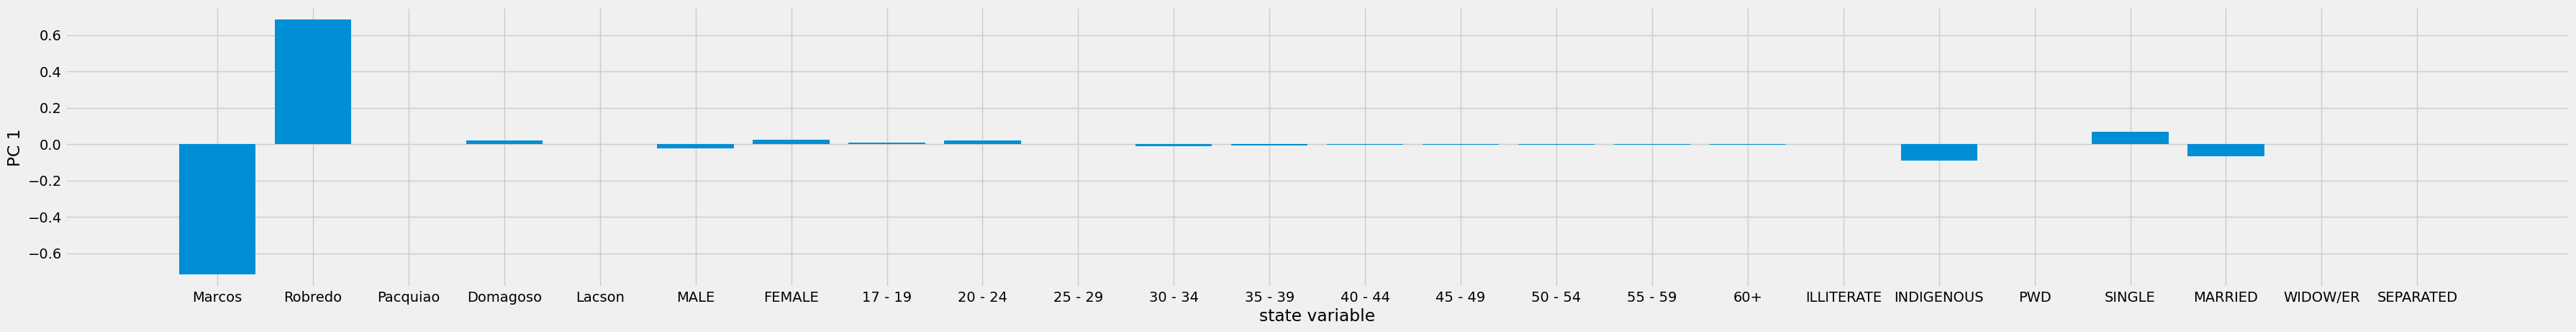

In [109]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(p_2022.columns, p_2022_pca.components_[0,:])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/2022_pc1", bbox_inches='tight')
plt.show()

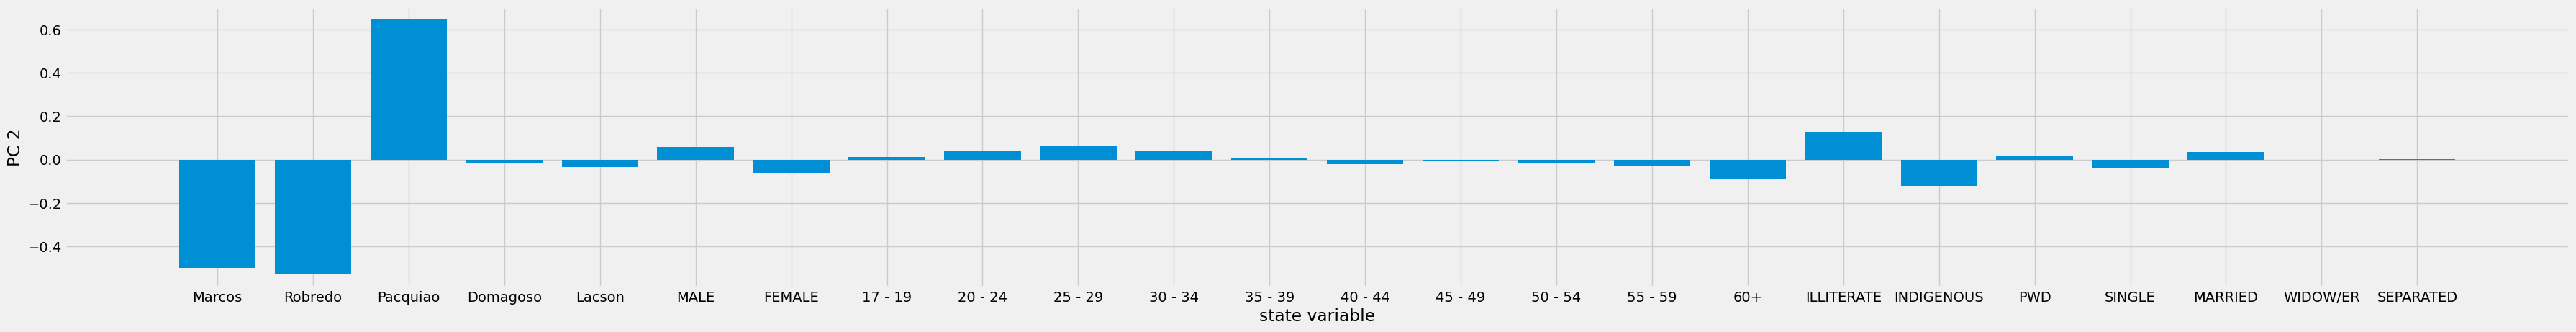

In [110]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(p_2022.columns, p_2022_pca.components_[1,:])
plt.xlabel("state variable")
plt.ylabel("PC 2")
plt.savefig("./Paper/figures/2022_pc2", bbox_inches='tight')
plt.show()

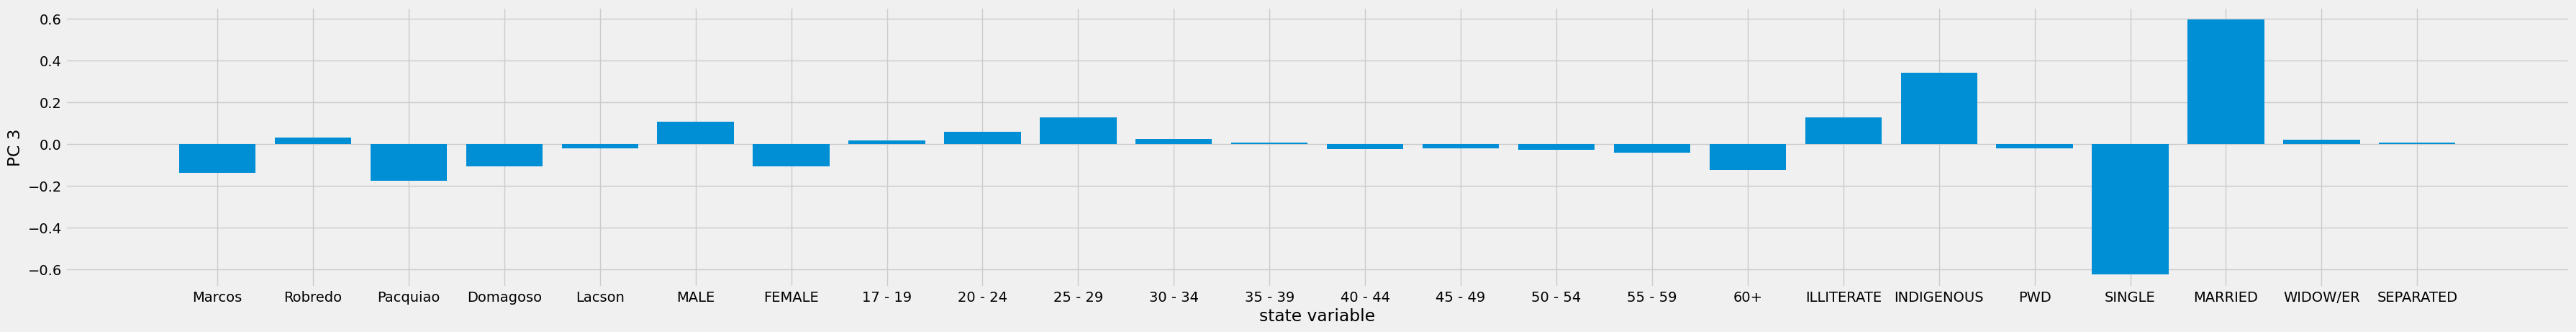

In [111]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(p_2022.columns, p_2022_pca.components_[2,:])
plt.xlabel("state variable")
plt.ylabel("PC 3")
plt.savefig("./Paper/figures/2022_pc3", bbox_inches='tight')
plt.show()

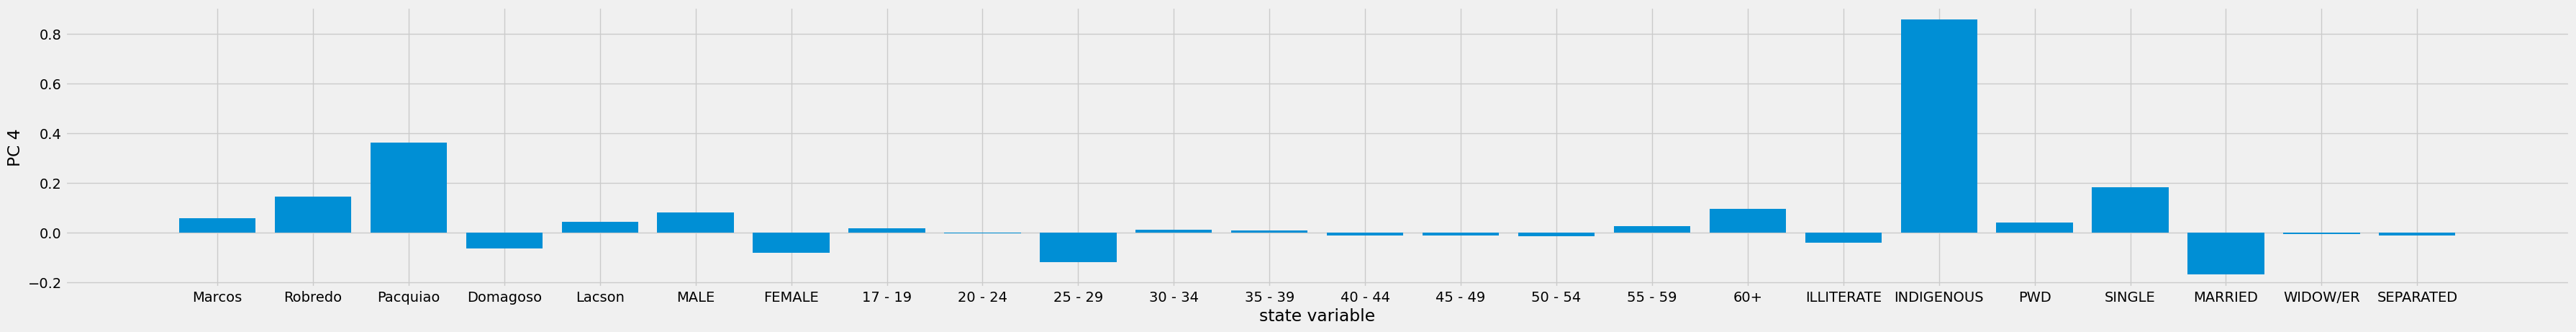

In [112]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(p_2022.columns, p_2022_pca.components_[3,:])
plt.xlabel("state variable")
plt.ylabel("PC 4")
plt.savefig("./Paper/figures/2022_pc4", bbox_inches='tight')
plt.show()

## 2016 VP Elections

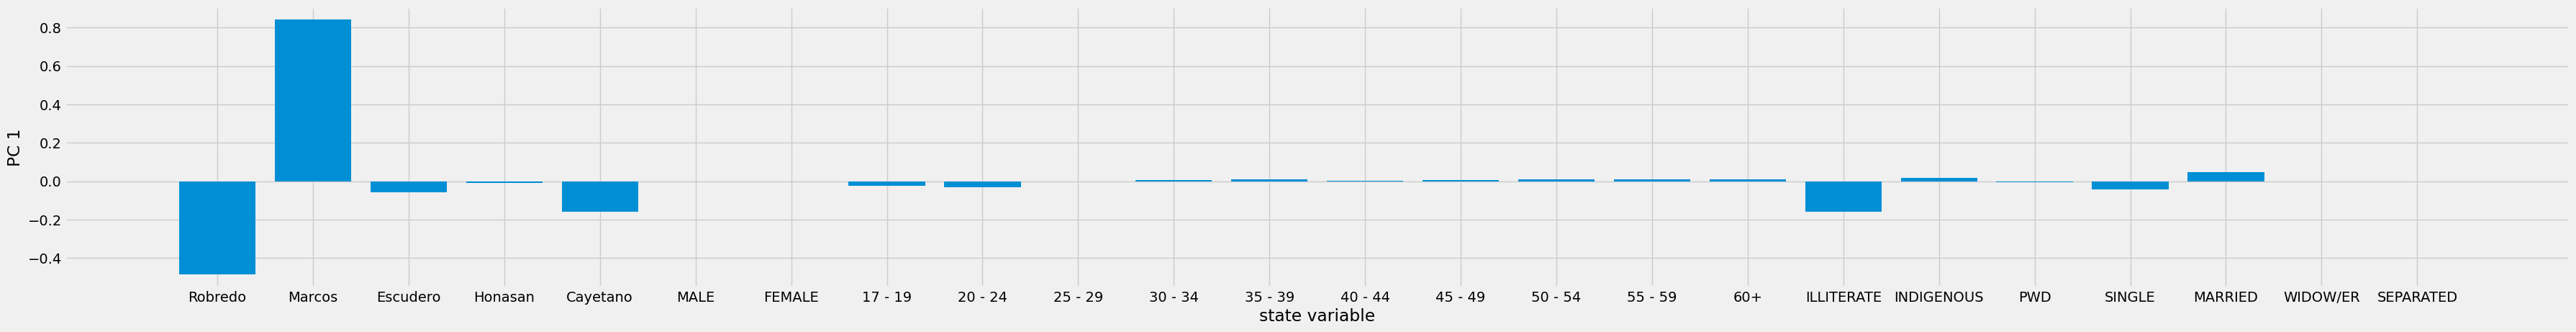

In [113]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(vp_2016.columns, vp_2016_pca.components_[0,:])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/2016_pc1", bbox_inches='tight')
plt.show()

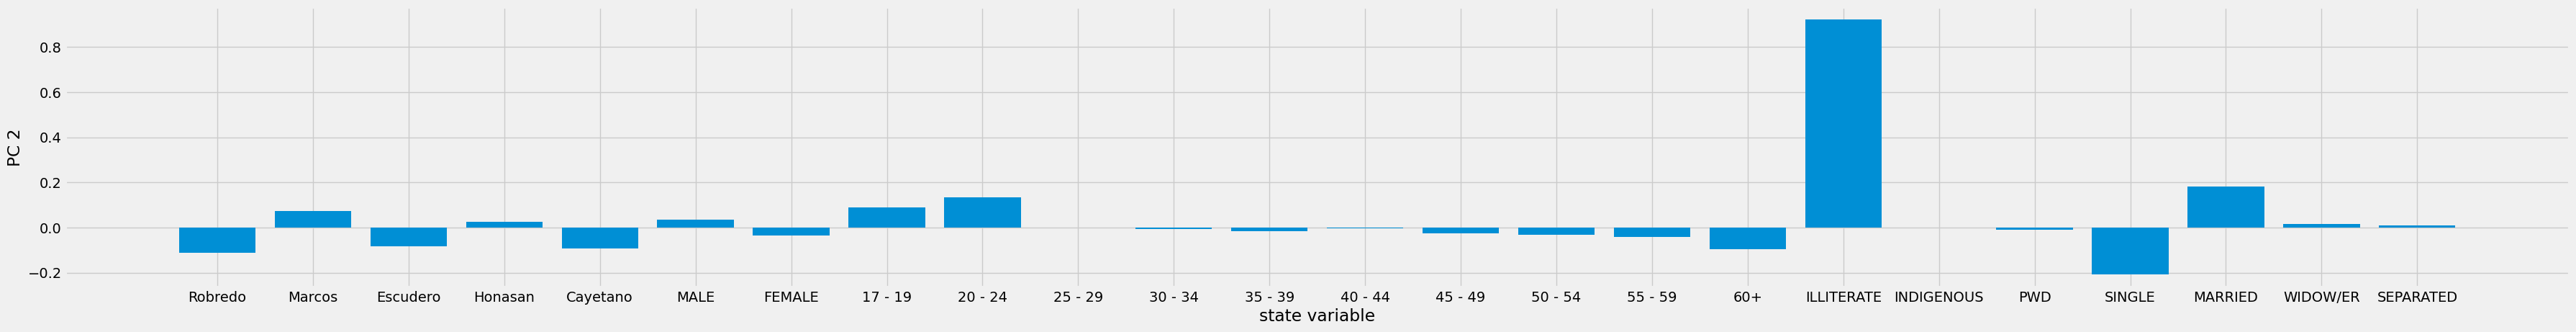

In [114]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(vp_2016.columns, vp_2016_pca.components_[1,:])
plt.xlabel("state variable")
plt.ylabel("PC 2")
plt.savefig("./Paper/figures/2016_pc2", bbox_inches='tight')
plt.show()

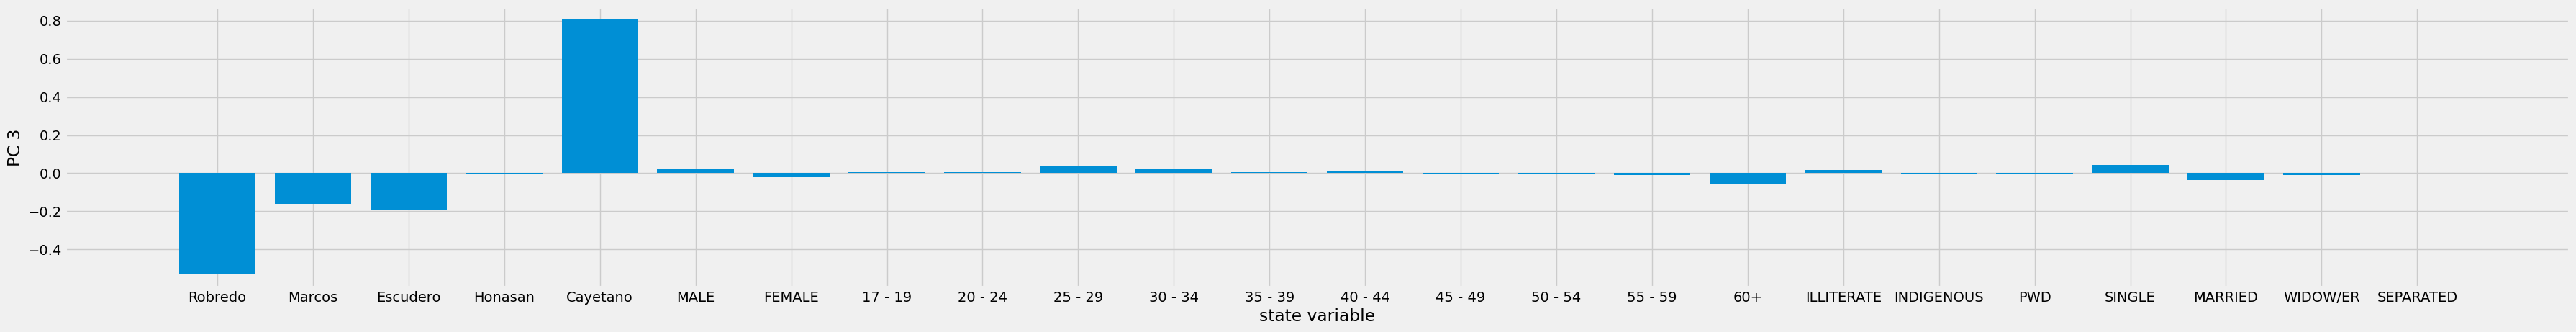

In [115]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(vp_2016.columns, vp_2016_pca.components_[2,:])
plt.xlabel("state variable")
plt.ylabel("PC 3")
plt.savefig("./Paper/figures/2016_pc3", bbox_inches='tight')
plt.show()

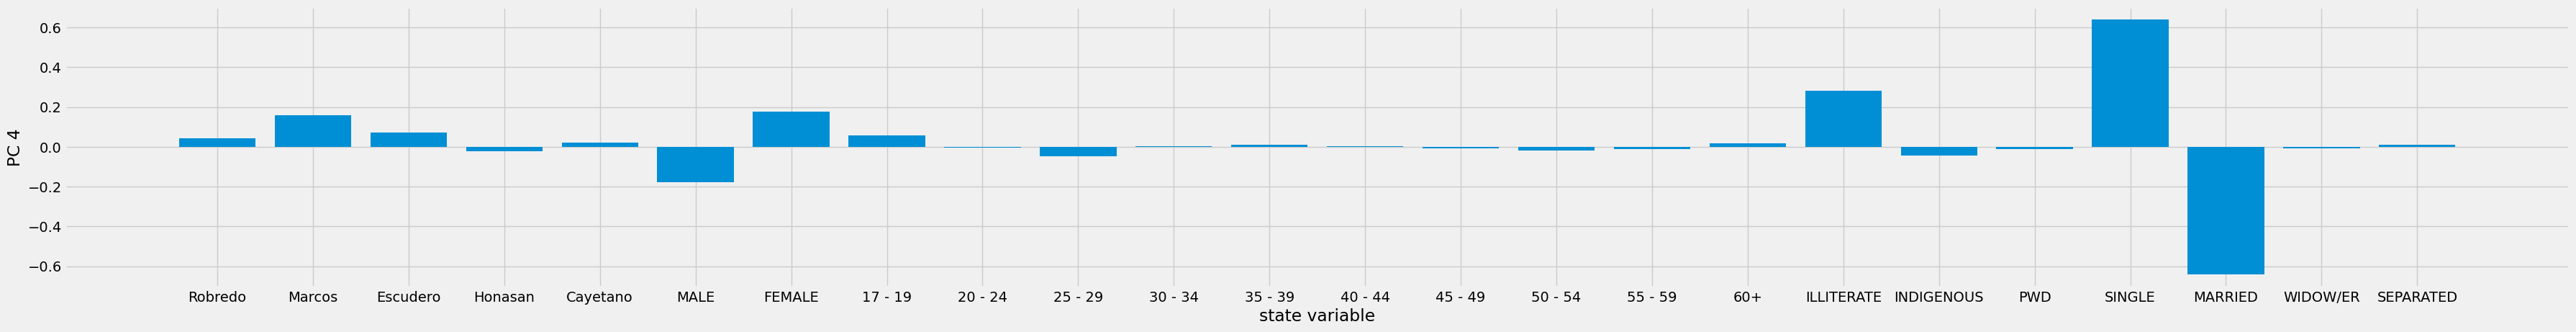

In [116]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(vp_2016.columns, vp_2016_pca.components_[3,:])
plt.xlabel("state variable")
plt.ylabel("PC 4")
plt.savefig("./Paper/figures/2016_pc4", bbox_inches='tight')
plt.show()

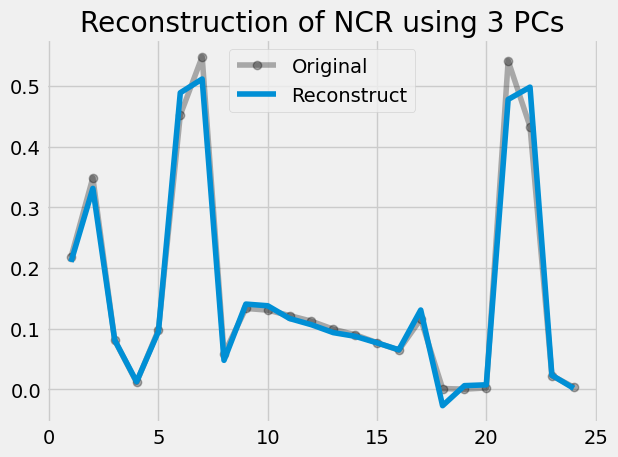

In [117]:
numberOfPCs = 3
temp_pca = PCA(numberOfPCs)
temp_reconstruction = temp_pca.inverse_transform(temp_pca.fit_transform(vp_2016))

plt.plot(range(1, 25), vp_2016.iloc[0], 'o-', color='black', alpha=0.3,label="Original")
plt.plot(range(1, 25), temp_reconstruction[0,:],label="Reconstruct")
plt.title("Reconstruction of NCR" + " using " + str(numberOfPCs) +  " PCs")
plt.tight_layout()
plt.legend()

In [118]:
PCs = pd.DataFrame([], columns=vp_2016.columns)
for i in range(len(vp_2016_pca.components_)):
    PCs.loc[len(PCs.index)] = vp_2016_pca.components_[i,:]
PCs

Robredo    Marcos  Escudero   Honasan  Cayetano      MALE    FEMALE  \
0  -0.484091  0.840419 -0.056165 -0.008480 -0.157544  0.000096 -0.000096   
1  -0.112618  0.074126 -0.084141  0.025528 -0.091979  0.034906 -0.034906   
2  -0.530555 -0.158824 -0.189167 -0.005367  0.804837  0.020948 -0.020948   
3   0.042971  0.157529  0.071757 -0.021620  0.020602 -0.176755  0.176755   
4   0.466449  0.270007 -0.639226 -0.063869  0.219746  0.054913 -0.054913   
5  -0.082090 -0.090008 -0.373669  0.012361 -0.165456  0.392035 -0.392035   
6   0.425965  0.306649  0.058134  0.003183  0.379020 -0.161225  0.161225   
7  -0.143809 -0.195082 -0.603173  0.117163 -0.290595 -0.259402  0.259402   
8   0.129821  0.076278  0.020311  0.001142  0.047561  0.123815 -0.123815   
9   0.114578  0.097504  0.114925 -0.036146  0.058069  0.405697 -0.405697   
10  0.073076  0.047032 -0.076014 -0.333721 -0.000825 -0.043355  0.043355   
11  0.057257  0.051574 -0.012568  0.665910  0.044776 -0.091231  0.091231   
12  0.009728  0.005200 -0.021523  0.177861 -0.014352  0.113935 -0.113935   
13  0.051625  0.050736  0.047688  0.588337  0.043669  0.107454 -0.107454   
14  0.003977  0.000593 -0.019264  0.081914  0.024227  0.038340 -0.038340   
15 -0.022320 -0.021119 -0.039924  0.045018 -0.042231  0.002385 -0.002385   
16 -0.004953 -0.005798 -0.012858 -0.003539 -0.006572 -0.675303 -0.673170   

     17 - 19   20 - 24   25 - 29  ...   50 - 54   55 - 59       60+  \
0  -0.024525 -0.030140  0.000536  ...  0.009026  0.010362  0.011889   
1   0.088439  0.133440 -0.001539  ... -0.031506 -0.041241 -0.096939   
2   0.005663  0.003807  0.034542  ... -0.006458 -0.008528 -0.059765   
3   0.057612 -0.003687 -0.048617  ... -0.017207 -0.012722  0.016601   
4   0.431037 -0.021911 -0.147397  ...  0.002619  0.009834  0.034954   
5  -0.428282  0.131774  0.155838  ...  0.003029  0.020002  0.414354   
6  -0.613491 -0.088753  0.135598  ...  0.022388  0.023803  0.177837   
7  -0.237898 -0.275207  0.073738  ...  0.078235  0.023878 -0.299683   
8   0.050841 -0.070352  0.271832  ... -0.035034 -0.044647 -0.383094   
9  -0.057277 -0.198768 -0.109458  ...  0.009138 -0.077863 -0.389995   
10 -0.171023  0.664985  0.235172  ... -0.037735 -0.058168 -0.447821   
11  0.012634  0.319348  0.001421  ... -0.209933 -0.174270  0.012802   
12  0.096206 -0.059681  0.105464  ... -0.324944 -0.132326  0.092027   
13 -0.028232  0.010863  0.129564  ...  0.257521  0.397536 -0.273242   
14 -0.160644  0.194774 -0.652594  ... -0.058347  0.087523 -0.014670   
15 -0.057665  0.183509  0.020672  ...  0.044140  0.007365 -0.035495   
16  0.014042  0.077258 -0.030984  ... -0.067109  0.081699  0.018661   

    ILLITERATE  INDIGENOUS       PWD    SINGLE   MARRIED  WIDOW/ER  SEPARATED  
0    -0.157545    0.017764 -0.004168 -0.044013  0.047004 -0.001631  -0.001360  
1     0.920979    0.000064 -0.008483 -0.207297  0.181588  0.014731   0.010978  
2     0.018166   -0.001317 -0.000468  0.042072 -0.034346 -0.008797   0.001070  
3     0.280523   -0.043837 -0.011236  0.637872 -0.640616 -0.008684   0.011427  
4    -0.048824   -0.041419  0.009266 -0.011347  0.023565 -0.002915  -0.009303  
5     0.049195    0.108490  0.145875  0.152605 -0.171061  0.024574  -0.006118  
6     0.134742   -0.015717 -0.113855 -0.095245  0.119542 -0.023997  -0.000299  
7    -0.019744   -0.073741 -0.008085  0.012739 -0.018648 -0.015896   0.021805  
8    -0.006143    0.797908  0.000732  0.046474 -0.070009  0.018007   0.005529  
9     0.031766   -0.371766  0.136272  0.189301  0.050003 -0.221137  -0.018167  
10   -0.117910   -0.217909  0.078535 -0.071515 -0.115774  0.202798  -0.015509  
11   -0.063151   -0.006041  0.463971  0.111279  0.134186 -0.195003  -0.050462  
12   -0.031432   -0.258055 -0.371255 -0.150181 -0.192207  0.385725  -0.043337  
13   -0.006551   -0.085120 -0.303172 -0.055488 -0.141479  0.117138   0.079829  
14   -0.019291    0.238278 -0.072955 -0.143969 -0.162647  0.326330  -0.019714  
15   -0.022019   -0.026490 -0.471205  0.319774  0.282872 -0.213786  -0.388859

## Voter Preference Change (2016-2022)

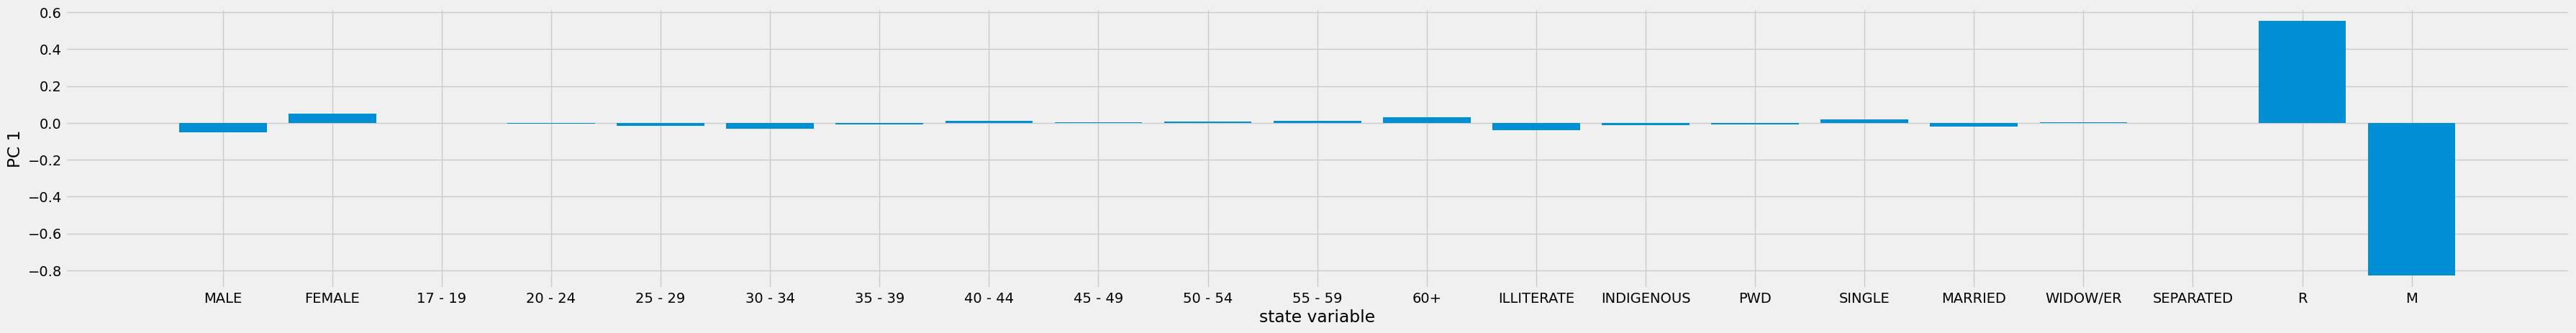

In [119]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(delta_2016vp_2022p.columns, delta_2016vp_2022p_pca.components_[0,:])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/delta20162022pc1", bbox_inches='tight')
plt.show()

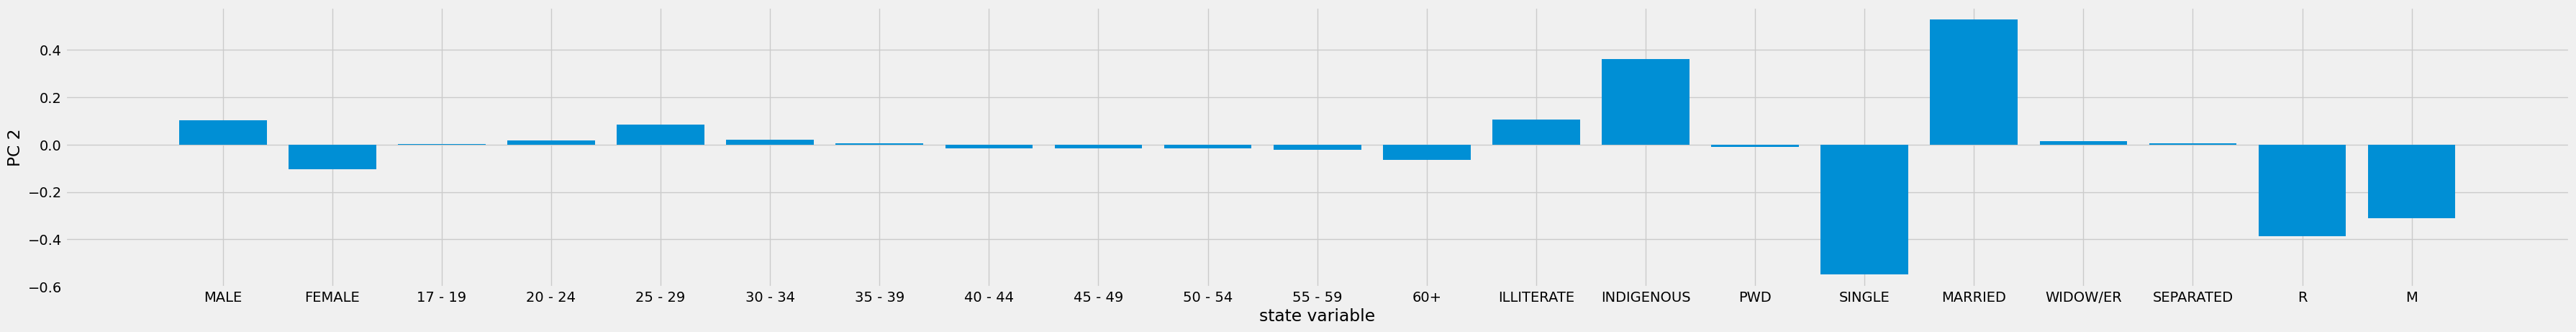

In [120]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(delta_2016vp_2022p.columns, delta_2016vp_2022p_pca.components_[1,:])
plt.xlabel("state variable")
plt.ylabel("PC 2")
plt.savefig("./Paper/figures/delta20162022pc2", bbox_inches='tight')
plt.show()

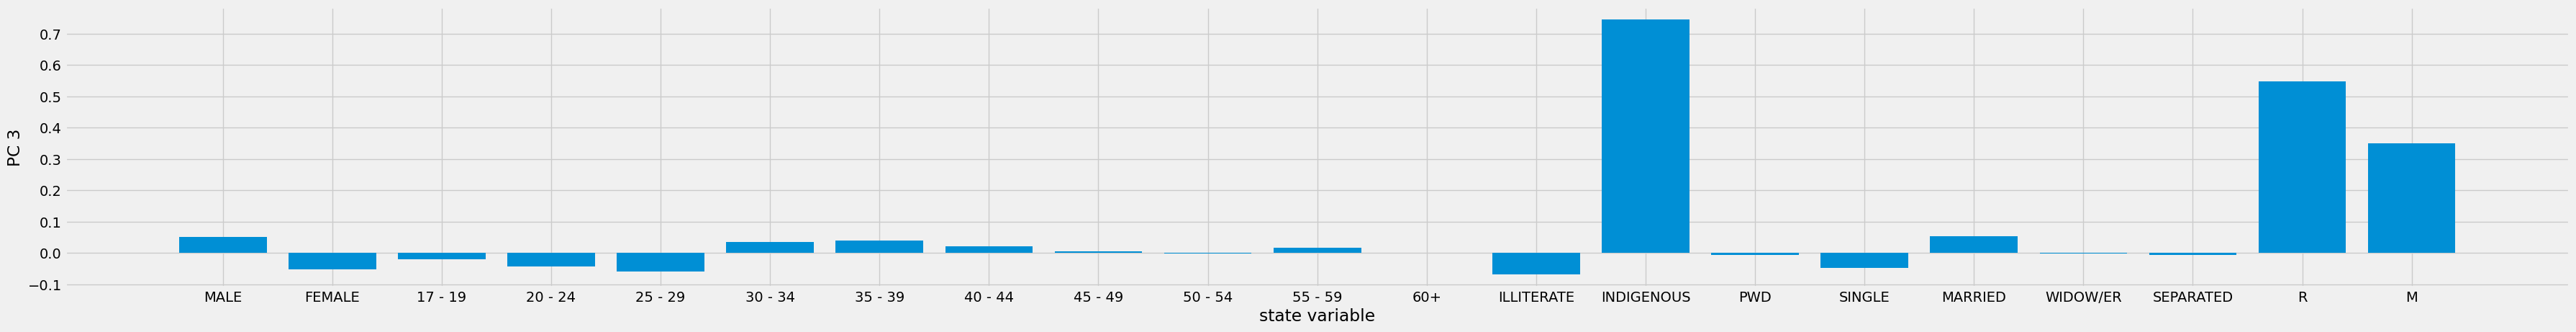

In [121]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(delta_2016vp_2022p.columns, delta_2016vp_2022p_pca.components_[2,:])
plt.xlabel("state variable")
plt.ylabel("PC 3")
plt.savefig("./Paper/figures/delta20162022pc3", bbox_inches='tight')
plt.show()

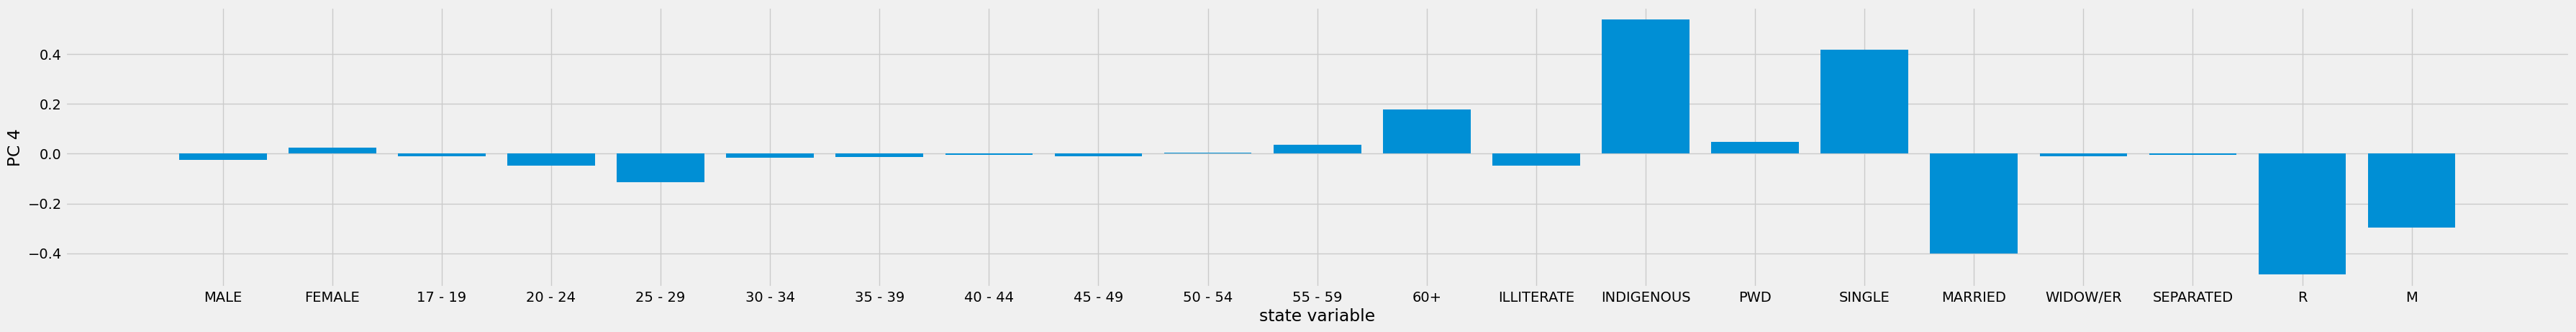

In [122]:
fig = plt.figure()
fig.set_figwidth(40)
plt.bar(delta_2016vp_2022p.columns, delta_2016vp_2022p_pca.components_[3,:])
plt.xlabel("state variable")
plt.ylabel("PC 4")
plt.savefig("./Paper/figures/delta20162022pc4", bbox_inches='tight')
plt.show()

## Voter Preference Change (2016-2022 Only Age)

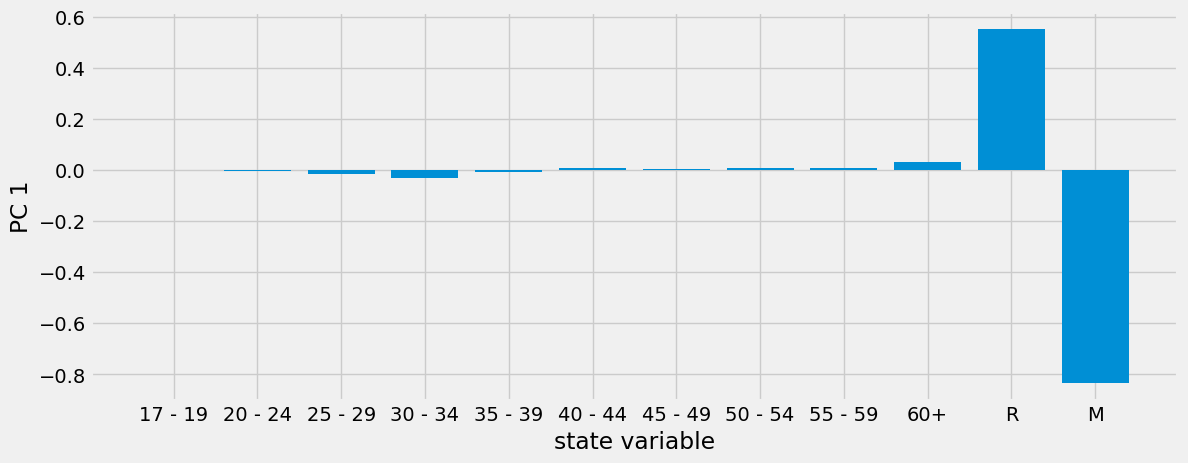

In [123]:
fig = plt.figure()
fig.set_figwidth(12.5)
plt.bar(delta_2016vp_2022p_age.columns, delta_2016vp_2022p_age_pca.components_[0,:])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/delta20162022agepc1", bbox_inches='tight')
plt.show()

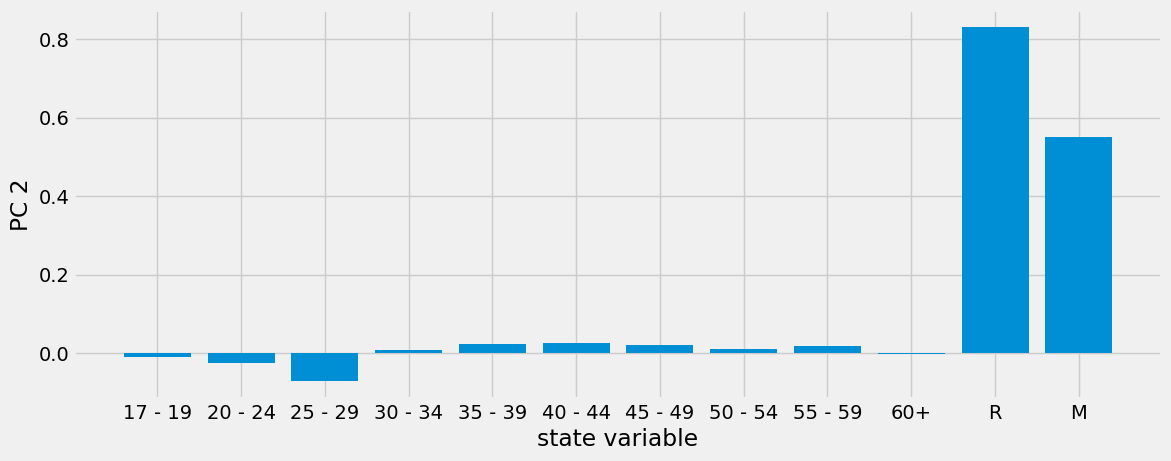

In [124]:
fig = plt.figure()
fig.set_figwidth(12.5)
plt.bar(delta_2016vp_2022p_age.columns, delta_2016vp_2022p_age_pca.components_[1,:])
plt.xlabel("state variable")
plt.ylabel("PC 2")
plt.savefig("./Paper/figures/delta20162022agepc2", bbox_inches='tight')
plt.show()

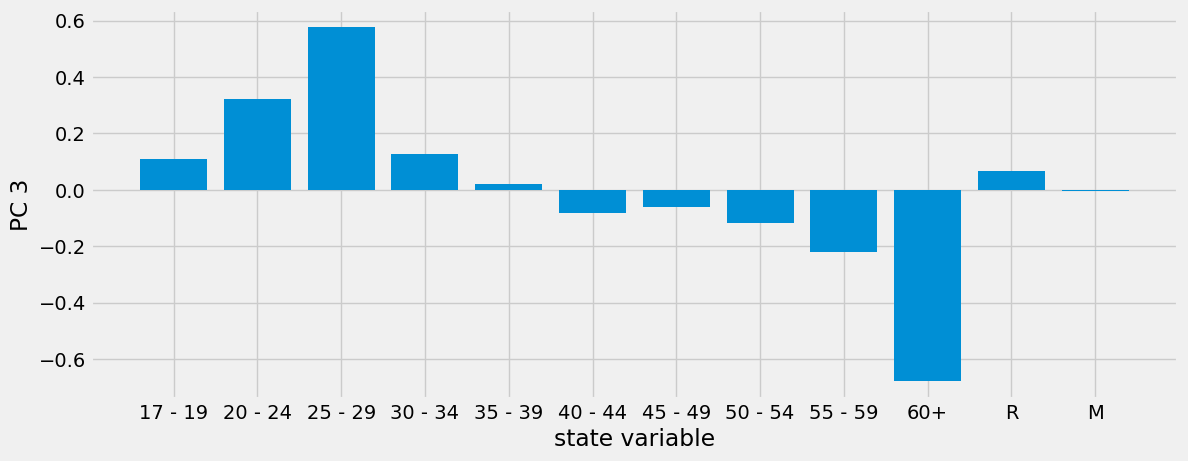

In [125]:
fig = plt.figure()
fig.set_figwidth(12.5)
plt.bar(delta_2016vp_2022p_age.columns, delta_2016vp_2022p_age_pca.components_[2,:])
plt.xlabel("state variable")
plt.ylabel("PC 3")
plt.savefig("./Paper/figures/delta20162022agepc3", bbox_inches='tight')
plt.show()

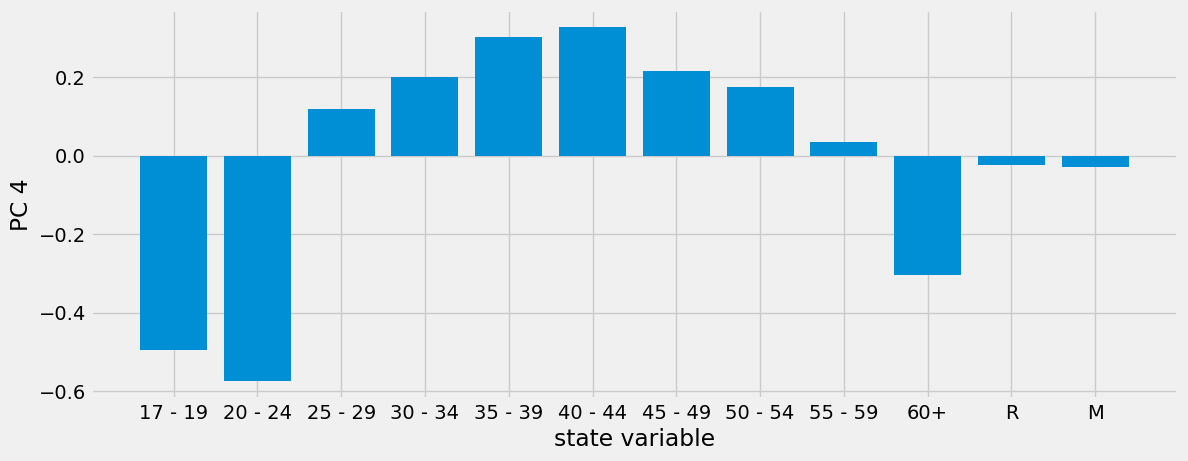

In [126]:
fig = plt.figure()
fig.set_figwidth(12.5)
plt.bar(delta_2016vp_2022p_age.columns, delta_2016vp_2022p_age_pca.components_[3,:])
plt.xlabel("state variable")
plt.ylabel("PC 4")
plt.savefig("./Paper/figures/delta20162022agepc4", bbox_inches='tight')
plt.show()

## Plots for Paper

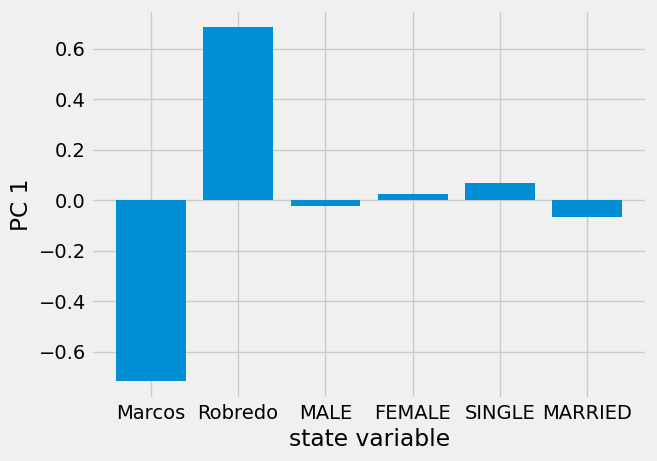

In [127]:
pc1_2022_compressed = pd.DataFrame(columns=p_2022.columns)
pc1_2022_compressed.loc[0] = p_2022_pca.components_[0,:]
pc1_2022_compressed = pc1_2022_compressed[['Marcos', 'Robredo', 'MALE', 'FEMALE', 'SINGLE', 'MARRIED']]

fig = plt.figure()
plt.bar(pc1_2022_compressed.columns, pc1_2022_compressed.loc[0])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/trimmed_2022_pc1", bbox_inches='tight')
plt.show()

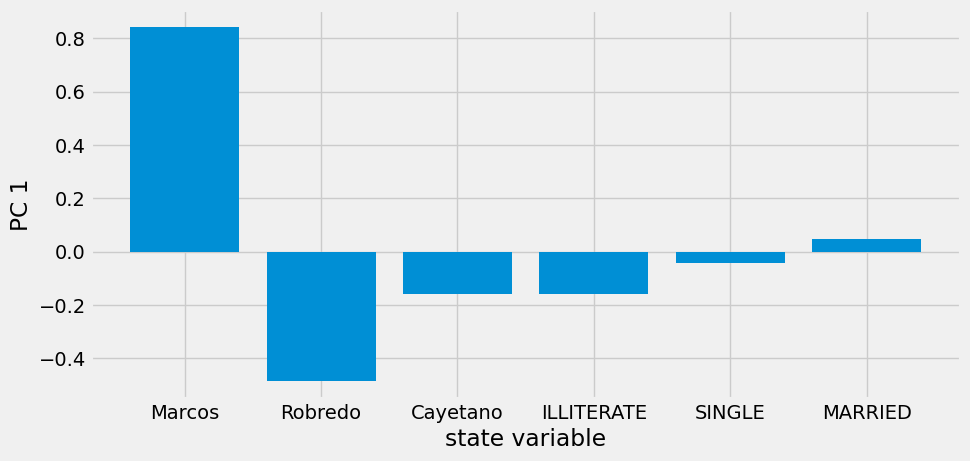

In [128]:
pc1_2016_compressed = pd.DataFrame(columns=vp_2016.columns)
pc1_2016_compressed.loc[0] = vp_2016_pca.components_[0,:]
pc1_2016_compressed = pc1_2016_compressed[['Marcos', 'Robredo', 'Cayetano', 'ILLITERATE', 'SINGLE', 'MARRIED']]

fig = plt.figure()
fig.set_figwidth(10)
plt.bar(pc1_2016_compressed.columns, pc1_2016_compressed.loc[0])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/trimmed_2016_pc1", bbox_inches='tight')
plt.show()

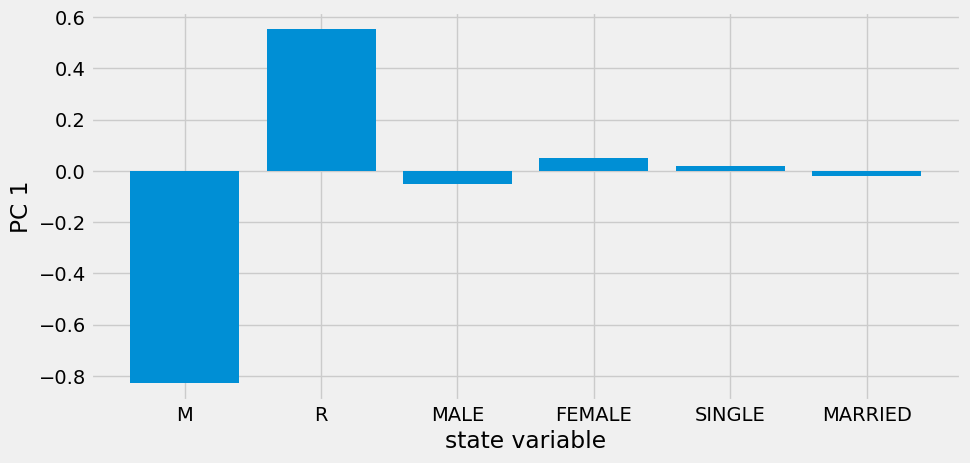

In [129]:
pc1_20162022_compressed = pd.DataFrame(columns=delta_2016vp_2022p.columns)
pc1_20162022_compressed.loc[0] = delta_2016vp_2022p_pca.components_[0,:]
pc1_20162022_compressed = pc1_20162022_compressed[['M', 'R', 'MALE', 'FEMALE', 'SINGLE', 'MARRIED']]

fig = plt.figure()
fig.set_figwidth(10)
plt.bar(pc1_20162022_compressed.columns, pc1_20162022_compressed.loc[0])
plt.xlabel("state variable")
plt.ylabel("PC 1")
plt.savefig("./Paper/figures/trimmed_20162022_pc1", bbox_inches='tight')
plt.show()

# Clustering

## 2016 VP

/Users/coby/virtualenvs/cee_263n/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


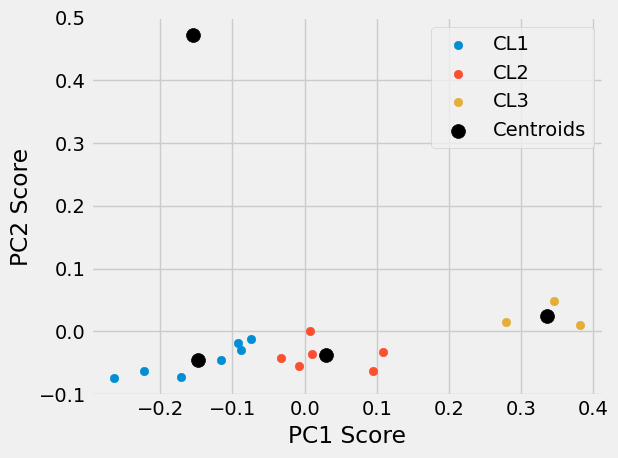

In [130]:
number_of_clusters = 4
number_of_pcs = 2 

temp_pca = PCA(n_components=number_of_pcs)
temp_projected_data = temp_pca.fit_transform(vp_2016)

kmeans = KMeans(n_clusters = number_of_clusters, random_state=1)
membership = kmeans.fit_predict(temp_projected_data) #Important this can be done projecting with any number of PCs 
Score = kmeans.score(temp_projected_data)
centers = kmeans.cluster_centers_
centers_initial_base = temp_pca.inverse_transform(centers)

y_km = membership
plt.scatter(temp_projected_data[y_km ==0,0], temp_projected_data[y_km == 0,1], label="CL1") 
plt.scatter(temp_projected_data[y_km ==1,0], temp_projected_data[y_km == 1,1], label="CL2")
plt.scatter(temp_projected_data[y_km ==2,0], temp_projected_data[y_km == 2,1], label="CL3")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color='black', s=100, label='Centroids')
#plt.scatter(temp_projected_data[y_km ==3,0], temp_projected_data[y_km == 3,1], s=50, c='cyan')
#plt.scatter(temp_projected_data[y_km ==4,0], temp_projected_data[y_km == 4,1], s=50, c='orange') #uncomment if k=5
plt.xlabel("PC1 Score")
plt.ylabel("PC2 Score")
plt.legend()
plt.savefig('2016_cluster.png', bbox_inches='tight')
plt.tight_layout()

In [131]:
cluster_map = pd.DataFrame()
data = pd.read_csv('2016_data.csv')

cluster_map['Province'] = data['REGION'].values
cluster_map['cluster'] = kmeans.labels_
cluster_map

Province  cluster
0           NCR        1
1           CAR        2
2      REGION I        2
3     REGION II        2
4    REGION III        1
5   REGION IV-A        1
6   REGION IV-B        0
7      REGION V        0
8     REGION VI        0
9    REGION VII        0
10  REGION VIII        1
11    REGION IX        0
12     REGION X        0
13    REGION XI        1
14   REGION XII        1
15       CARAGA        0
16        BARMM        3

## 2022 Presidential

/Users/coby/virtualenvs/cee_263n/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


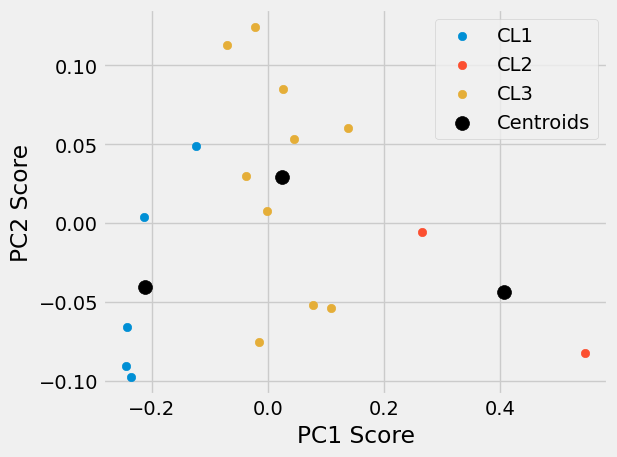

In [132]:
number_of_clusters = 3
number_of_pcs = 2 

temp_pca = PCA(n_components=number_of_pcs)
temp_projected_data = temp_pca.fit_transform(p_2022)

kmeans = KMeans(n_clusters = number_of_clusters, random_state=1)
membership = kmeans.fit_predict(temp_projected_data) #Important this can be done projecting with any number of PCs 
Score = kmeans.score(temp_projected_data)
centers = kmeans.cluster_centers_
centers_initial_base = temp_pca.inverse_transform(centers)

y_km = membership
plt.scatter(temp_projected_data[y_km ==0,0], temp_projected_data[y_km == 0,1], label="CL1") 
plt.scatter(temp_projected_data[y_km ==1,0], temp_projected_data[y_km == 1,1], label="CL2")
plt.scatter(temp_projected_data[y_km ==2,0], temp_projected_data[y_km == 2,1], label="CL3")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color='black', s=100, label='Centroids')
#plt.scatter(temp_projected_data[y_km ==3,0], temp_projected_data[y_km == 3,1], s=50, c='cyan')
#plt.scatter(temp_projected_data[y_km ==4,0], temp_projected_data[y_km == 4,1], s=50, c='orange') #uncomment if k=5
plt.xlabel("PC1 Score")
plt.ylabel("PC2 Score")
plt.legend()
plt.savefig('2022_cluster.png', bbox_inches='tight')
plt.tight_layout()

In [133]:
cluster_map = pd.DataFrame()
data = pd.read_csv('2022_data.csv')

cluster_map['Province'] = data['REGION'].values
cluster_map['cluster'] = kmeans.labels_
cluster_map

Province  cluster
0           NCR        2
1           CAR        0
2      REGION I        0
3     REGION II        0
4    REGION III        2
5   REGION IV-A        2
6   REGION IV-B        2
7      REGION V        1
8     REGION VI        1
9    REGION VII        2
10  REGION VIII        2
11    REGION IX        2
12     REGION X        0
13    REGION XI        0
14   REGION XII        2
15       CARAGA        2
16        BARMM        2

## 2016-2022 Elections (Age only)

/Users/coby/virtualenvs/cee_263n/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


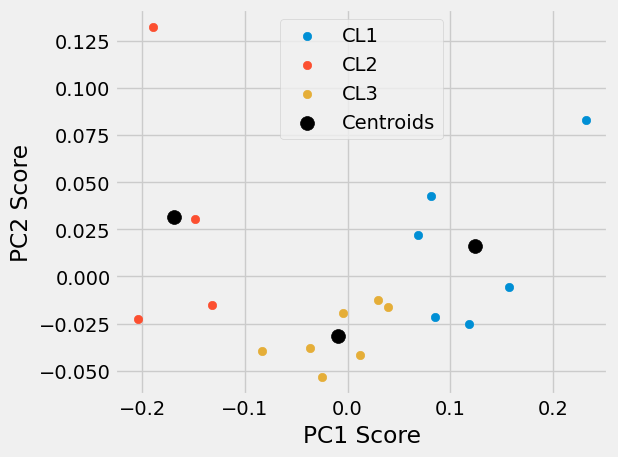

In [134]:
number_of_clusters = 3
number_of_pcs = 2 

temp_pca = PCA(n_components=number_of_pcs)
temp_projected_data = temp_pca.fit_transform(delta_2016vp_2022p_age)

kmeans = KMeans(n_clusters = number_of_clusters, random_state=1)
membership = kmeans.fit_predict(temp_projected_data) #Important this can be done projecting with any number of PCs 
Score = kmeans.score(temp_projected_data)
centers = kmeans.cluster_centers_
centers_initial_base = temp_pca.inverse_transform(centers)

y_km = membership
plt.scatter(temp_projected_data[y_km ==0,0], temp_projected_data[y_km == 0,1], label="CL1") 
plt.scatter(temp_projected_data[y_km ==1,0], temp_projected_data[y_km == 1,1], label="CL2")
plt.scatter(temp_projected_data[y_km ==2,0], temp_projected_data[y_km == 2,1], label="CL3")
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], color='black', s=100, label='Centroids')
#plt.scatter(temp_projected_data[y_km ==3,0], temp_projected_data[y_km == 3,1], s=50, c='cyan')
#plt.scatter(temp_projected_data[y_km ==4,0], temp_projected_data[y_km == 4,1], s=50, c='orange') #uncomment if k=5
plt.xlabel("PC1 Score")
plt.ylabel("PC2 Score")
plt.legend()
plt.savefig('1622_cluster.png', bbox_inches='tight')
plt.tight_layout()

In [135]:
cluster_map = pd.DataFrame()
data = pd.read_csv('2022_data.csv')

cluster_map['Province'] = data['REGION'].values
cluster_map['cluster'] = kmeans.labels_
cluster_map

Province  cluster
0           NCR        0
1           CAR        2
2      REGION I        0
3     REGION II        0
4    REGION III        0
5   REGION IV-A        0
6   REGION IV-B        2
7      REGION V        0
8     REGION VI        2
9    REGION VII        1
10  REGION VIII        2
11    REGION IX        2
12     REGION X        1
13    REGION XI        1
14   REGION XII        2
15       CARAGA        1
16        BARMM        2